In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [98]:
df = pd.read_csv('data2.txt')

In [99]:
df.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [100]:
df.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


# Normalizing

In [101]:
scaler = StandardScaler()
df[['Size']] = scaler.fit_transform(df[['Size']])
df[['Bedrooms']] = scaler.fit_transform(df[['Bedrooms']])
df[['Price']] = scaler.fit_transform(df[['Price']])
df.head()

,Size,Bedrooms,Price
0,0.131415,-0.226093,0.480890
1,-0.509641,-0.226093,-0.084983
2,0.507909,-0.226093,0.231097
3,-0.743677,-1.554392,-0.876398
4,1.271071,1.102205,1.612637


### Selecting the feature

In [102]:
label = 'Price'
X = df.drop(label,axis=1) # feature
X.head()


,Size,Bedrooms
0,0.131415,-0.226093
1,-0.509641,-0.226093
2,0.507909,-0.226093
3,-0.743677,-1.554392
4,1.271071,1.102205


### Selecting the target data

In [103]:
arr = [[1,2],[3,4]]
np.array(arr).T

array([[1, 3],
       [2, 4]])

In [104]:
y = df[label] # target data
y.head()

0    0.480890
1   -0.084983
2    0.231097
3   -0.876398
4    1.612637
Name: Price, dtype: float64

In [105]:
m = y.shape[0]

## We know,
$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \$$
or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \$$ 

## For cost function

$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \$$ 

In [106]:
def compute_cost(X,y,theta):
    m=X.shape[0]
    func = np.dot(X,theta[0])+theta[1]
    cost = sum(((func-y)**2))/(2*m)
    return cost
# compute_cost(X_train,y_train,[w_init, b_init])
compute_cost(X,y,[[0.67008921, 0.0964247 ],0.00443311])

0.1497868516472897

Gradient descent for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \
 \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously

## Derivative for gradient descent

$$
\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \
  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \
\end{align*}
$$

In [107]:
# def grad(X,y,theta):
#     m,n = X.shape
#     dj_dw = np.zeros(n)
#     dj_db = 0.

#     for i in range(m):                             
#         err = (np.dot(np.array(X)[i], theta[0]) + theta[1]) - y[i]   
#         for j in range(n):                         
#             dj_dw[j] = dj_dw[j] + err * np.array(X)[i, j]
#         dj_db = dj_db + err
#     dj_dw = dj_dw / m                                
#     dj_db = dj_db / m                                
#     deriv = [dj_dw,dj_db]
#     return deriv
# # grad(X_train,y_train,[w_init,b_init])
# grad(X,y,[[0.,0.],0.])

In [112]:
def gradient(X,y,theta):
    m,n = X.shape
    deriv = [np.zeros(n),0]
    func = np.dot(X,theta[0])+theta[1]-y
    deriv[0] = np.dot(X.T,func)/m
    deriv[1] = np.sum(func)/m
    return deriv
theta = [[0.,0.],0.]
gradient(X,y,theta)

[array([-0.85498759, -0.44226112]), 6.614094614788166e-17]

In [109]:
def gradient_descent(X,y,theta,alpha,iters,compute_cost,gradient):
    J_history = np.zeros((iters,1))

    for iter in range(iters):

        J = compute_cost(X,y,theta)

        J_history[iter] = J

        deriv = gradient(X,y,theta)
        
        theta[0] = theta[0] - alpha * deriv[0]
        
        theta[1] = theta[1] - alpha * deriv[1]
        
    return theta[0],theta[1],J_history



theta=[np.zeros(X.shape[1]),0.]
alpha = 0.02
iterations = 300


w_fin, b_fin, j_hist = gradient_descent(X,y,theta,alpha,iterations,compute_cost,gradient)


In [110]:
w_fin,b_fin

(array([ 0.85166401, -0.02013853]), -1.028727930264374e-16)

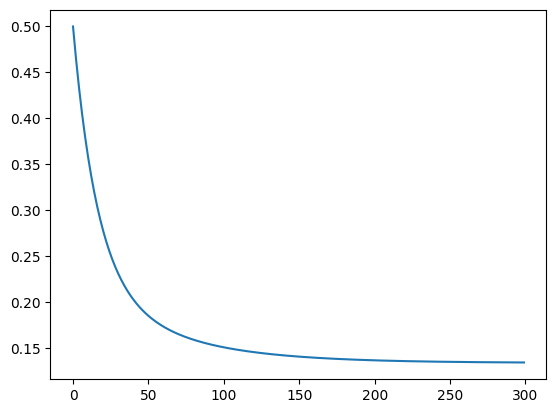

In [111]:
plt.plot(j_hist[:]);